In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv('winequality-red.csv',sep= ';')

In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
df.shape

(1599, 12)

<AxesSubplot:title={'center':'Scatterplot of fixed acidity and citric acid percentages'}, xlabel='fixed acidity', ylabel='citric acid'>

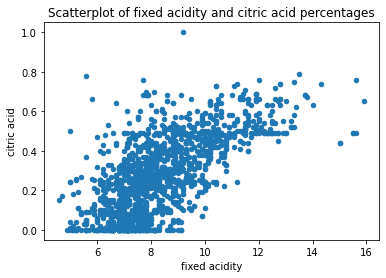

In [28]:
#plt.scatter(x=df['density'], y=df['pH'])
#plt.title('Scatterplot of density and pH percentages')

df.plot.scatter(x='fixed acidity', y='citric acid', title='Scatterplot of fixed acidity and citric acid percentages')

In [29]:
print(df.corr())

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [30]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [32]:
y = df['fixed acidity'].values.reshape(-1, 1)
X = df['citric acid'].values.reshape(-1, 1)

In [33]:
print('X shape:', X.shape)
print('X:', X)

X shape: (1599, 1)
X: [[0.  ]
 [0.  ]
 [0.04]
 ...
 [0.13]
 [0.12]
 [0.47]]


In [34]:
print(df['fixed acidity'].values) # [2.5 5.1 3.2 8.5 3.5 1.5 9.2 ... ]
print(df['fixed acidity'].values.shape) # (25,)

[7.4 7.8 7.8 ... 6.3 5.9 6. ]
(1599,)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [36]:
print(y_train)

[[ 8.7]
 [ 6.1]
 [10.9]
 ...
 [ 7.2]
 [ 7.9]
 [ 5.8]]


In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
regressor.intercept_

array([6.71511589])

In [39]:
regressor.coef_

array([[5.90366088]])

In [40]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [41]:
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[62.79989421]]


In [42]:
score = regressor.predict([[9.5]])
print(score)

[[62.79989421]]


In [43]:
y_pred = regressor.predict(X_test)

In [44]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual  Predicted
0       7.7   7.187409
1       7.8   7.718738
2      10.7   8.013921
3       8.5   8.545251
4       6.7   8.131994
..      ...        ...
315     6.8   6.715116
316     6.6   6.715116
317     8.3   8.191031
318     8.8   9.017544
319     9.1   6.951262

[320 rows x 2 columns]


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Squared Error=:",mse)
print("Root mean Error=:",rmse)
print("ABSOLUTE error=:",mae)


Squared Error=: 1.7537846932937817
Root mean Error=: 1.324305362555699
ABSOLUTE error=: 0.997407236127432


In [48]:
df = pd.read_csv('petrol_consumption.csv')

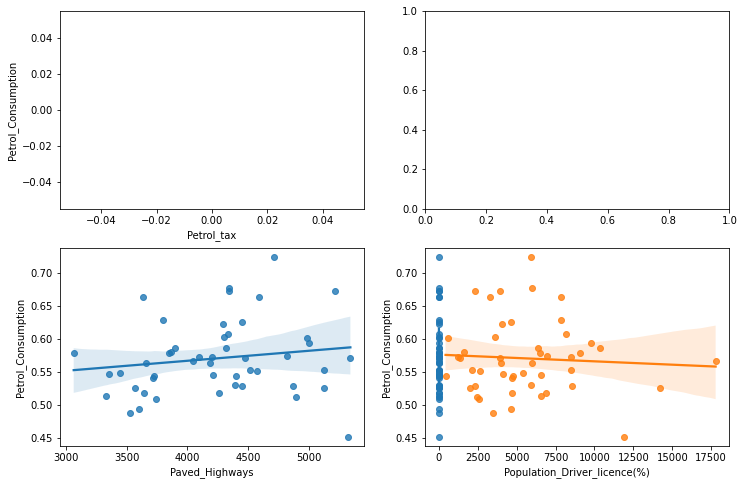

In [49]:
import seaborn as sns # Convention alias for Seaborn
#fixed acidity	volatile acidity	citric acid	residual sugar	chlorides	free sulfur dioxide	total sulfur dioxide
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for index, var in enumerate(variables):
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df, ax=ax[int(np.ceil(index/4))][int(np.mod(index, 2))])

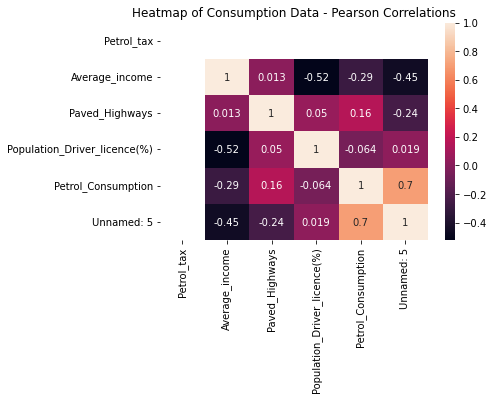

In [50]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

In [51]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [53]:
X.shape # (48, 4)

(48, 4)

In [54]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
regressor.intercept_

In [ ]:
regressor.coef_

In [ ]:
feature_names = X.columns

In [ ]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

In [ ]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

In [ ]:
regressor.score(X_test, y_test)

In [ ]:
regressor.score(X_train, y_train)